In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
# Categorical features
category_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Numerical features
value_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Binary features
bivariable_features = ['FastingBS', 'HeartDisease']

# Categorizing these features
data_category = data[category_features]
data_value = data[value_features]
data_bivariable = data[bivariable_features]

This part is for Categorical features

In [6]:
from scipy.stats import chi2_contingency
# Choose the columns that I want to analyze.
columns_to_analyze = data[category_features]

# Do the chi-square for every variable
for col in columns_to_analyze:
    # Create a contigency table
    contingency_table = pd.crosstab(data[col], data['HeartDisease'])
    # Chi-square
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col} and HeartDisease:")
    print(f"Chi-square Statistic: {chi2}, p-value: {p}\n")


Chi-square test for Sex and HeartDisease:
Chi-square Statistic: 84.14510134633775, p-value: 4.597617450809164e-20

Chi-square test for ChestPainType and HeartDisease:
Chi-square Statistic: 268.06723902181767, p-value: 8.08372842808765e-58

Chi-square test for RestingECG and HeartDisease:
Chi-square Statistic: 10.931469339140978, p-value: 0.0042292328167544925

Chi-square test for ExerciseAngina and HeartDisease:
Chi-square Statistic: 222.25938271530583, p-value: 2.907808387659878e-50

Chi-square test for ST_Slope and HeartDisease:
Chi-square Statistic: 355.91844319207905, p-value: 5.167637689470128e-78



In [7]:
# Categorical features
# In this part, we need to keep every columns 
# because they all has a very small p value and large chi-square value.

In [8]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Choose the columns for One-Hot code
categorical_feature = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
data_encoded = pd.get_dummies(data, columns = categorical_feature)

print("Pre-processed class :")
print(data_encoded)

Pre-processed class :
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainT

This part is for Numerical features

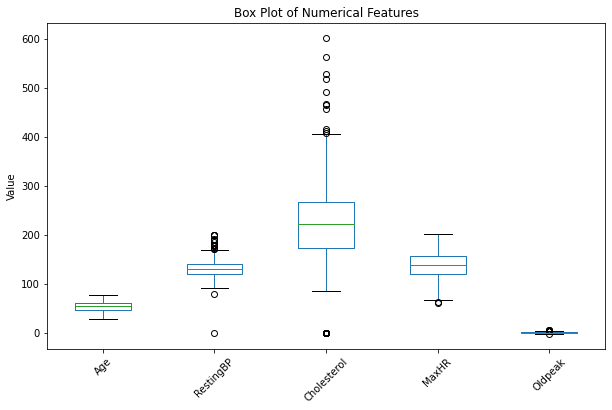

In [9]:
plt.figure(figsize=(10, 6))
data_encoded[value_features].boxplot()
plt.title('Box Plot of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [10]:
# Calculate IQR
Q1 = data_encoded[value_features].quantile(0.25)
Q3 = data_encoded[value_features].quantile(0.75)
IQR = Q3 - Q1

# Check the outlier
is_outlier = (data_encoded[value_features] < (Q1 - 1.5 * IQR)) | (data_encoded[value_features] > (Q3 + 1.5 * IQR))


In [11]:
# Outliers
is_outlier

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
913,False,False,False,False,False
914,False,False,False,False,False
915,False,False,False,False,False
916,False,False,False,False,False


In [12]:
# Convert outliers into median
for feature in data_value:
    medium_value = data_value[feature].median()
    
    data_encoded[feature] = data_encoded[feature].mask(is_outlier[feature], medium_value)

data_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [13]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
dataEncode_rescaled = scaler.fit_transform(data_encoded)
dataEncode_rescaled = pd.DataFrame(data = dataEncode_rescaled, columns = data_encoded.columns)
dataEncode_rescaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.615385,0.633540,0.0,0.777778,0.350877,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.871795,0.295031,0.0,0.659259,0.526316,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.487179,0.614907,0.0,0.229630,0.350877,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.589744,0.400621,0.0,0.303704,0.614035,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.743590,0.341615,0.0,0.407407,0.350877,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
dataEncode_rescaled.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

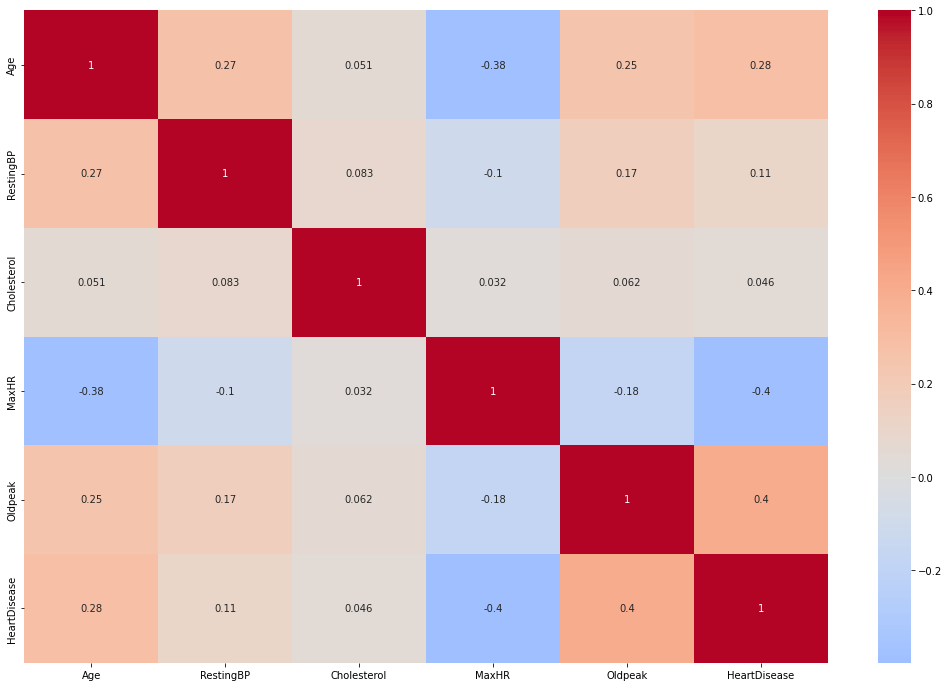

In [15]:
# Calculate the cor matrix for numerical features
corr_data = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
correlation_matrix_numerical_features = dataEncode_rescaled[corr_data].corr()

# Make a correlation heat map
plt.figure(figsize = (18, 12))
sns.heatmap(correlation_matrix_numerical_features, annot= True, cmap = 'coolwarm', center = 0)
plt.show()

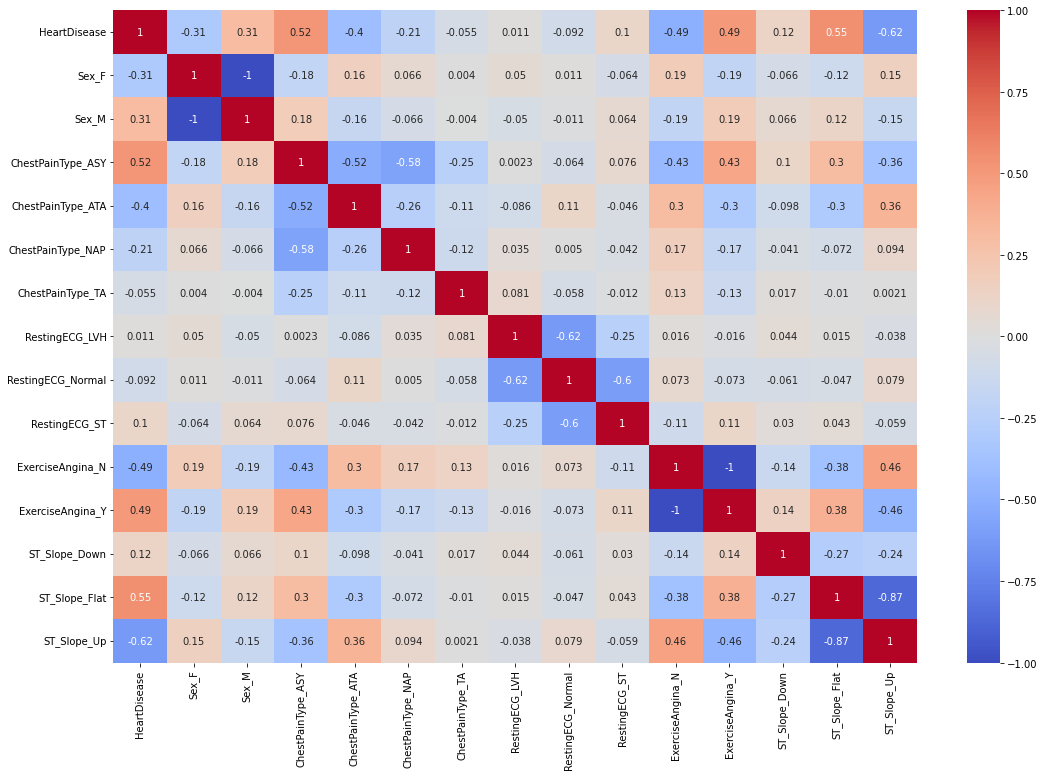

In [16]:
# Calculate the cor matrix for all features
corr_data2 = ['HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']
correlation_matrix_all_features = dataEncode_rescaled[corr_data2].corr()

# Make a correlation heat map
plt.figure(figsize = (18, 12))
sns.heatmap(correlation_matrix_all_features, annot= True, cmap = 'coolwarm', center = 0)
plt.show()

In [17]:
# Age has a negative correlation with Max Heart Rate. We may keep it.
# Chest pain NAP, it has a strong correlation with Chestpaint ASY

In [20]:
# We find no linear correlation between columns
# Select traits with an association between -0.25 and 0.25 with HeartDisease
low_correlation_features25 = correlation_matrix_all_features.index[
    (correlation_matrix_all_features['HeartDisease'] > -0.25) & (correlation_matrix_all_features['HeartDisease'] < 0.25)
]
# Select traits with an association between -0.35 and 0.35 with HeartDisease
low_correlation_features35 = correlation_matrix_all_features.index[
    (correlation_matrix_all_features['HeartDisease'] > -0.35) & (correlation_matrix_all_features['HeartDisease'] < 0.35)
]
# Select traits with an association between -0.45 and 0.45 with HeartDisease
low_correlation_features45 = correlation_matrix_all_features.index[
    (correlation_matrix_all_features['HeartDisease'] > -0.45) & (correlation_matrix_all_features['HeartDisease'] < 0.45)
]
dataEncode_rescaled_reduced25 = dataEncode_rescaled.drop(columns=low_correlation_features25)
dataEncode_rescaled_reduced35 = dataEncode_rescaled.drop(columns=low_correlation_features35)
dataEncode_rescaled_reduced45 = dataEncode_rescaled.drop(columns=low_correlation_features45)
dataEncode_rescaled_reduced25



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.615385,0.633540,0.0,0.777778,0.350877,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.428571,0.871795,0.295031,0.0,0.659259,0.526316,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.183673,0.487179,0.614907,0.0,0.229630,0.350877,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.408163,0.589744,0.400621,0.0,0.303704,0.614035,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.530612,0.743590,0.341615,0.0,0.407407,0.350877,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.230769,0.555901,0.0,0.481481,0.561404,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
914,0.816327,0.666667,0.335404,1.0,0.548148,0.947368,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
915,0.591837,0.487179,0.142857,0.0,0.355556,0.561404,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
916,0.591837,0.487179,0.468944,0.0,0.792593,0.350877,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [21]:
processed_data = dataEncode_rescaled_reduced25

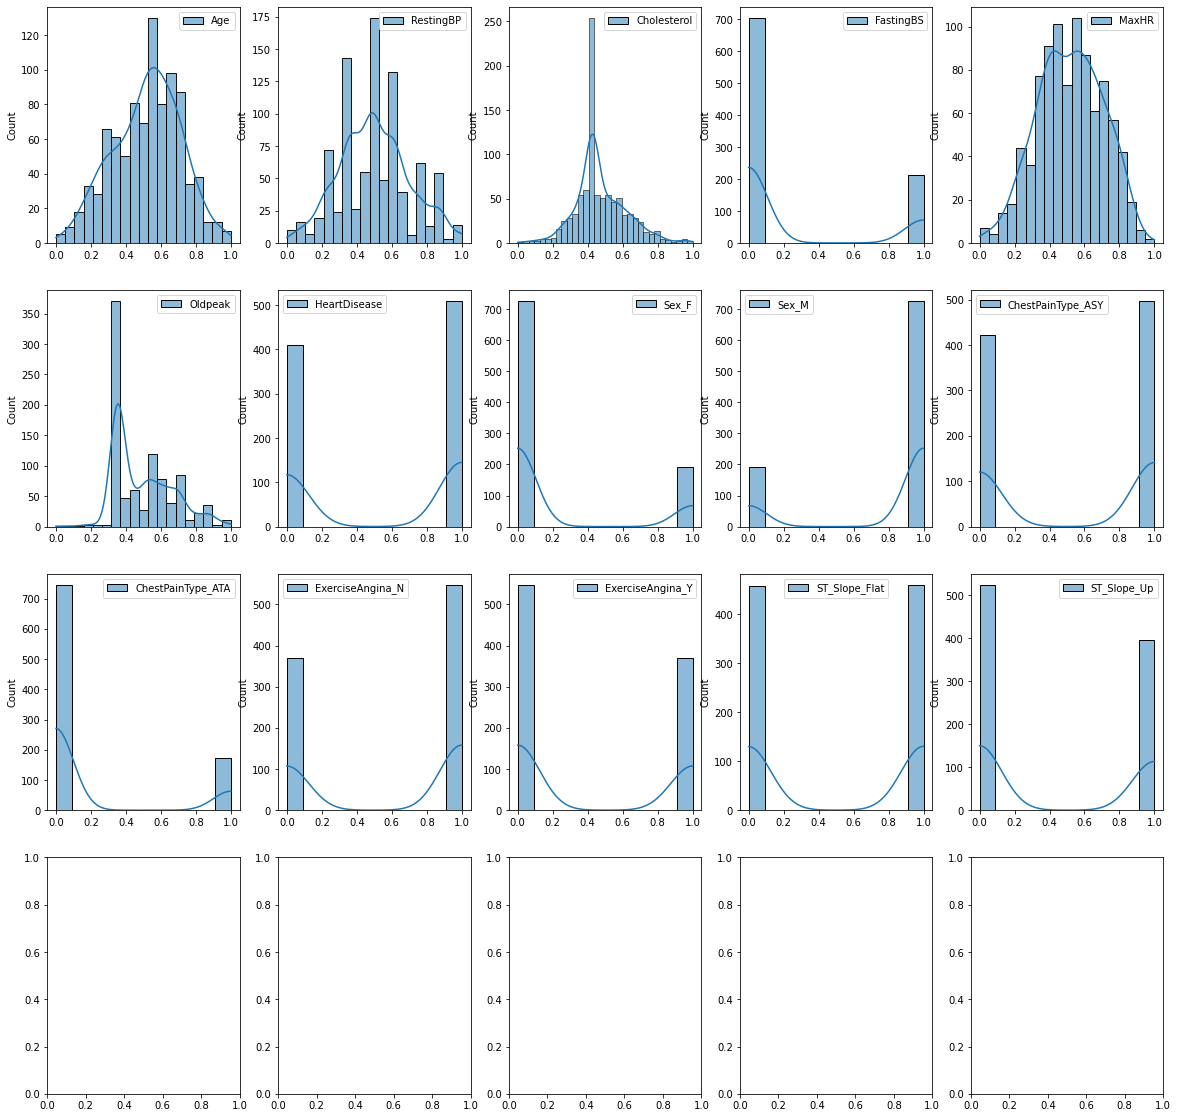

In [22]:
# Distribution Plot
fig, axes = plt.subplots(4,5, figsize=(20,20))
axes = axes.flatten()

# Loop to create subplots
i = 0
for item in processed_data.items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1

plt.show()

In [23]:
# Analysis of distribution plots
# The ratio for female to male is 2:7.
# Distribution plot for 'Oldpeak' has a really high peak.
# ChestPainType_ASY (asymptomatic): Half of the people have no symptoms.
# ChestPainType_ATA (atypical angina): Only about 2/7 people experienced ATA chest pain.
# ChestPainType_NAP (non-anginal): Only about 2/7 people experienced NAP chest pain.
# ChestPainType_TA (typical angina): Very little people experienced TA chest pain.

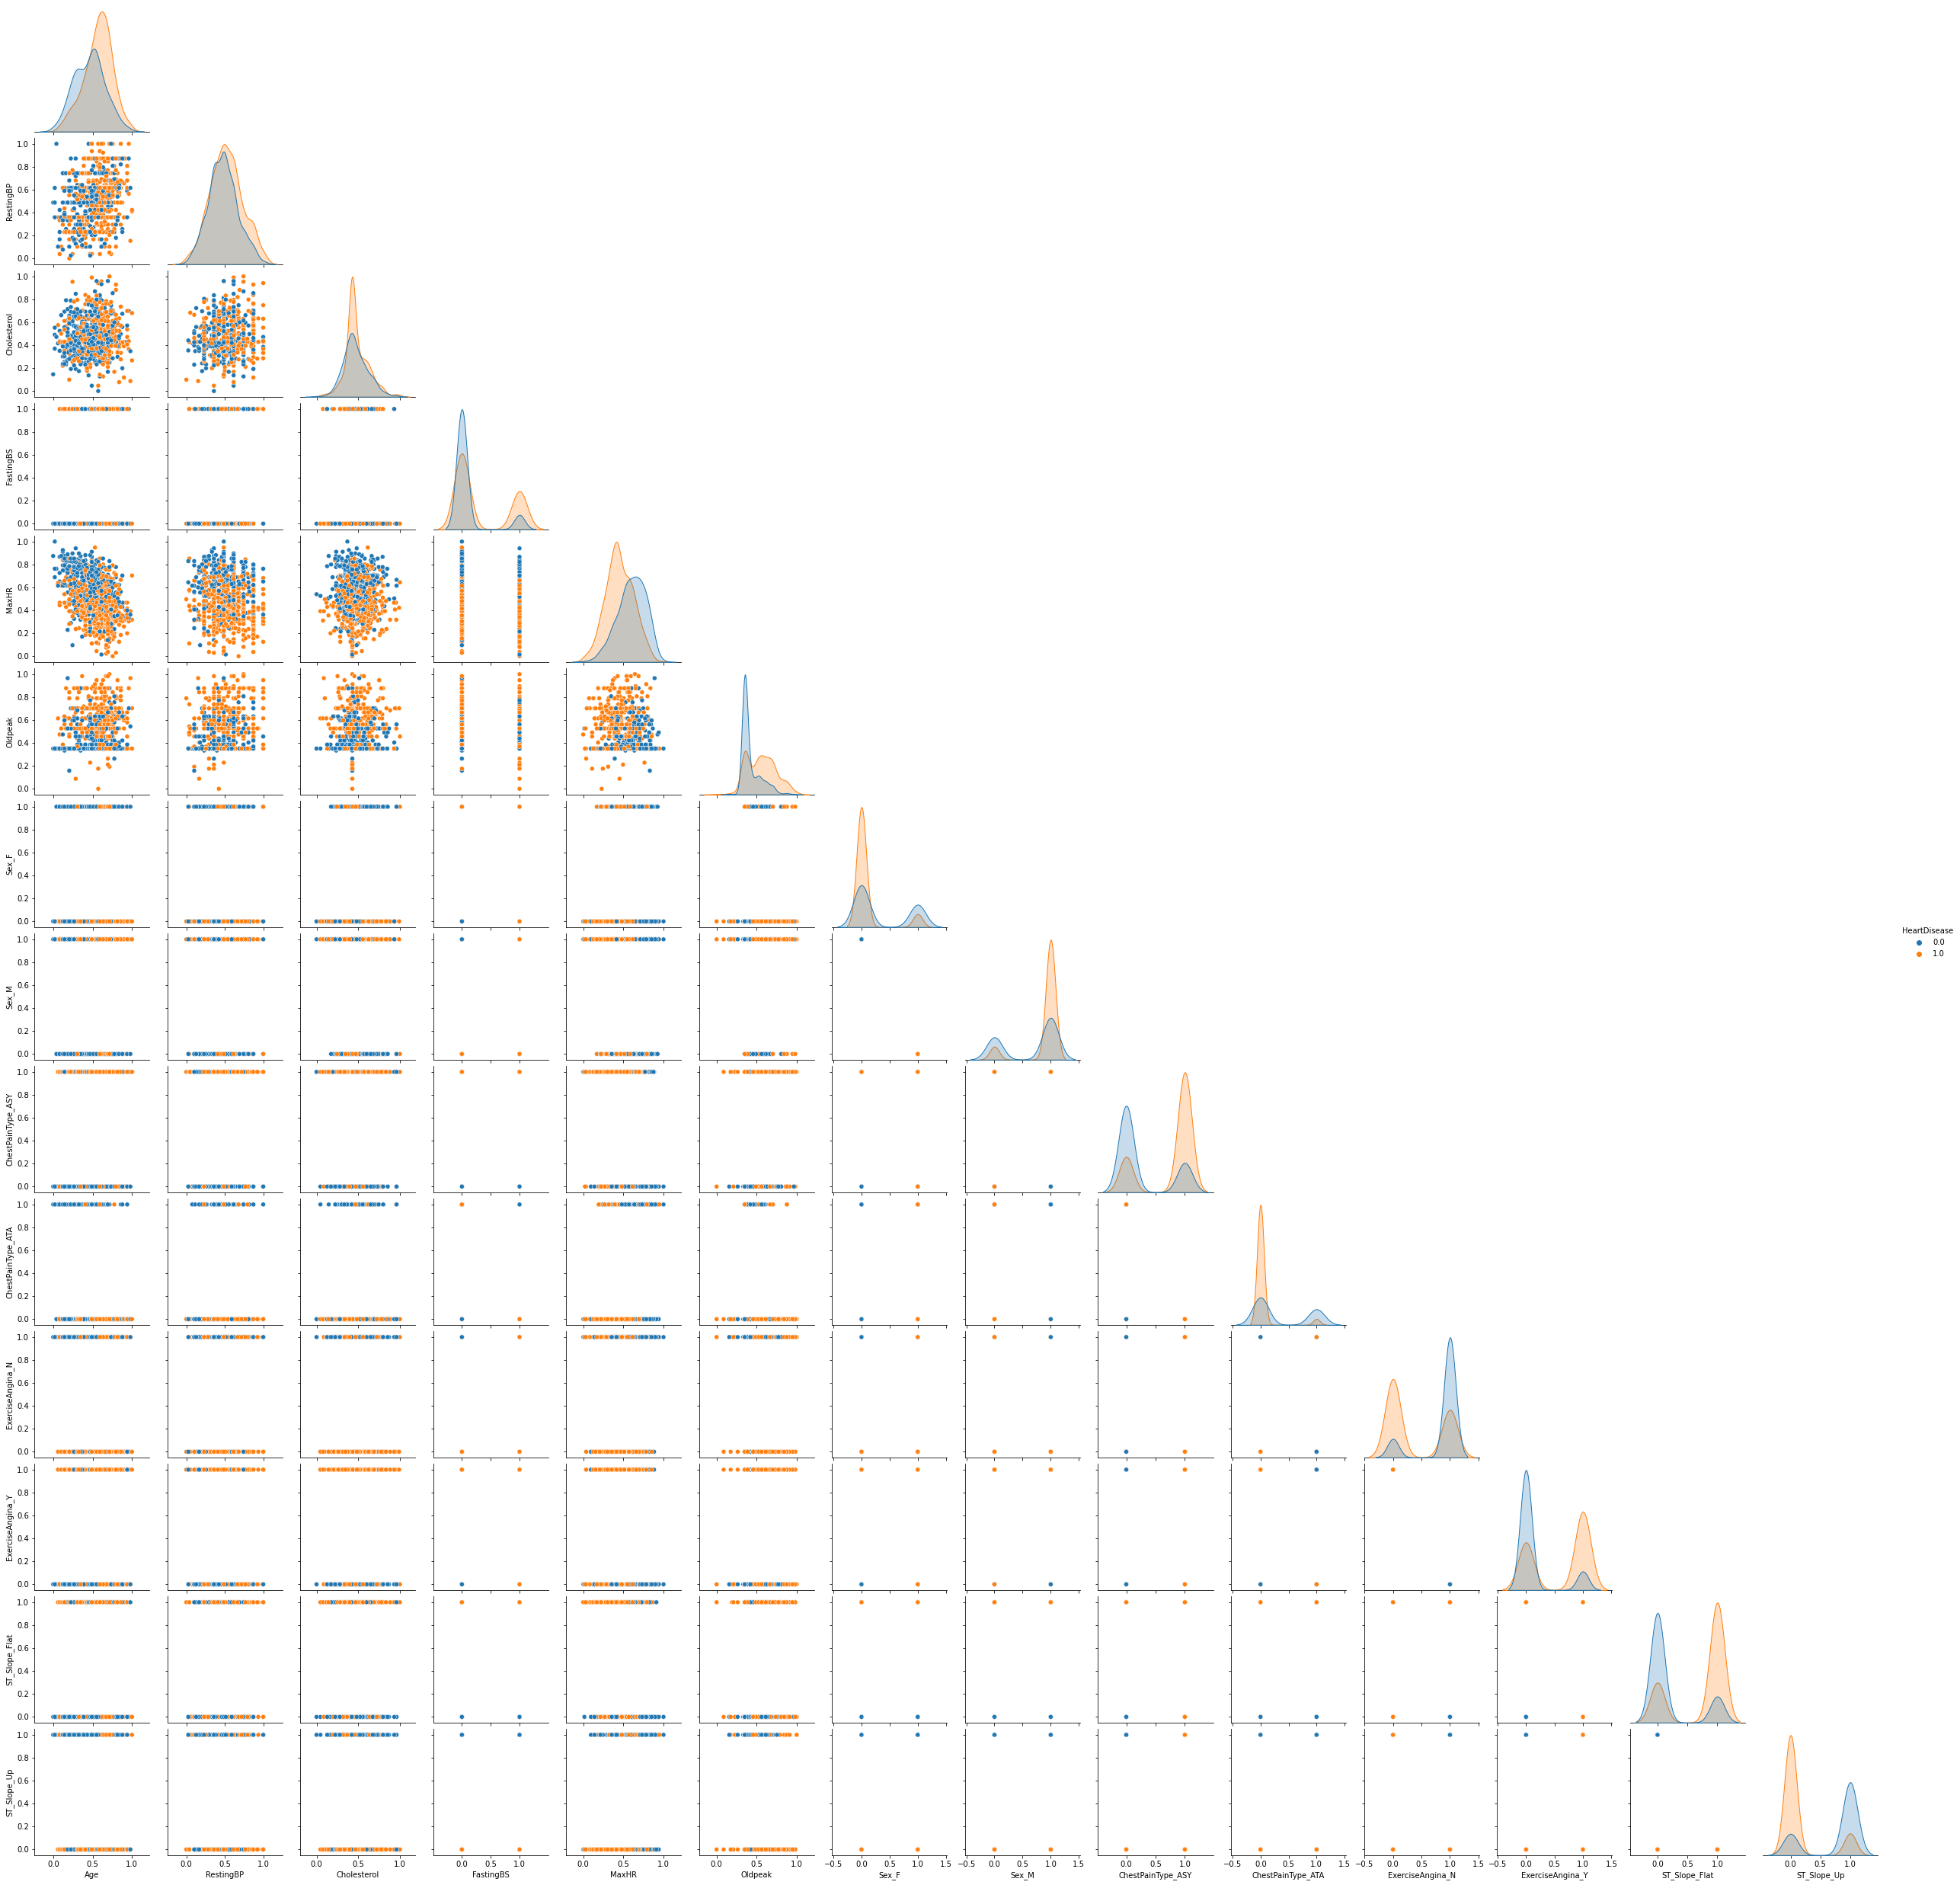

In [24]:
# Pair plot
sns.pairplot(data=processed_data, hue="HeartDisease", corner=True) 
plt.show()

In [25]:
# There is no linear relationship between any 2 features.

The part of bivariable features

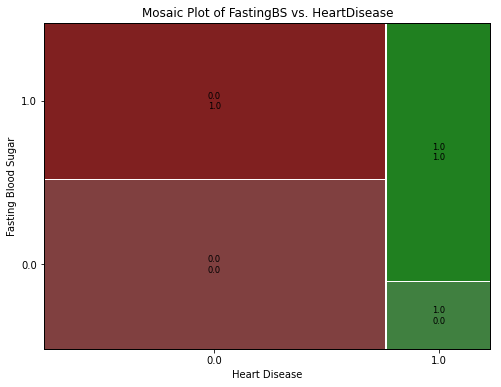

In [33]:
# Create Mosaic Plot
mosaic_data = pd.crosstab(processed_data['FastingBS'], processed_data['HeartDisease'])

# set the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Mosaic Plot
mosaic(mosaic_data.stack(), ax=ax, title='Mosaic Plot of FastingBS vs. HeartDisease')

# label
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Fasting Blood Sugar')

plt.show()